In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
pca = PCA(svd_solver='auto')

In [4]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [5]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.412809,2.893929,2.157,2.122,3.793043,0.004627,0.226893,0,0.400000,0,4,2,5,0.500000,0,,0,,0.500000,neutral
1,0.034578,4.363259,1.544,1.338,3.938872,0.006773,0.071555,0,0.600000,0,4,3,5,0.250000,0,,0,,0.250000,contradiction
2,0.171239,1.461504,1.640,1.371,3.895909,0.004943,0.082896,0,0.200000,0,3,1,5,0.666667,0,,0,,1.000000,entailment
3,0.504948,1.450955,2.500,1.500,3.851369,0.003431,0.527127,0,0.250000,1,2,1,4,0.500000,0,,0,,0.000000,neutral
4,0.187579,1.395699,1.406,1.000,3.869048,0.004221,0.067400,0,0.250000,0,2,1,4,0.500000,0,,0,,0.000000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,0.361301,4.298199,1.771,1.237,3.795421,0.005034,0.260124,0,0.600000,1,4,3,5,0.250000,0,,0,,0.333333,contradiction
449996,0.580354,2.821520,1.823,1.361,3.807770,0.004456,0.345090,0,0.400000,1,3,2,5,0.333333,0,,0,,0.500000,entailment
449997,0.000000,0.000000,1.792,0.000,0.000000,0.000000,0.000000,2,0.000000,0,2,0,3,0.500000,0,,0,,0.000000,entailment
449998,0.286427,4.122233,2.040,1.224,3.855192,0.005082,0.152291,1,1.000000,0,5,3,3,0.000000,0,,0,,0.333333,neutral


In [6]:
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.412809,2.893929,2.157,2.122,3.793043,0.004627,0.226893,0,0.400000,0,4,2,5,0.500000,0,0,0.500000,neutral
1,0.034578,4.363259,1.544,1.338,3.938872,0.006773,0.071555,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,contradiction
2,0.171239,1.461504,1.640,1.371,3.895909,0.004943,0.082896,0,0.200000,0,3,1,5,0.666667,0,0,1.000000,entailment
3,0.504948,1.450955,2.500,1.500,3.851369,0.003431,0.527127,0,0.250000,1,2,1,4,0.500000,0,0,0.000000,neutral
4,0.187579,1.395699,1.406,1.000,3.869048,0.004221,0.067400,0,0.250000,0,2,1,4,0.500000,0,0,0.000000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,0.361301,4.298199,1.771,1.237,3.795421,0.005034,0.260124,0,0.600000,1,4,3,5,0.250000,0,0,0.333333,contradiction
449996,0.580354,2.821520,1.823,1.361,3.807770,0.004456,0.345090,0,0.400000,1,3,2,5,0.333333,0,0,0.500000,entailment
449997,0.000000,0.000000,1.792,0.000,0.000000,0.000000,0.000000,2,0.000000,0,2,0,3,0.500000,0,0,0.000000,entailment
449998,0.286427,4.122233,2.040,1.224,3.855192,0.005082,0.152291,1,1.000000,0,5,3,3,0.000000,0,0,0.333333,neutral


In [7]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [8]:
# RTE3
y_t=[]
for i in y_:
    if i == "entailment":
        y_t.append(1)
    elif i == "neutral":
        y_t.append(2)
    else:
        y_t.append(0)

In [43]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [9]:
y_.unique()

array(['neutral', 'contradiction', 'entailment'], dtype=object)

In [10]:
Y_pca = pca.fit_transform(X)

In [11]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[4.64582181e-01 3.24238094e-01 1.07322158e-01 5.33929142e-02
 2.45882097e-02 1.06084546e-02 5.20293389e-03 2.86099313e-03
 2.18638354e-03 1.94289162e-03 1.79069483e-03 4.76551244e-04
 3.94815635e-04 2.62232418e-04 9.21633837e-05 5.80473662e-05
 2.80775688e-07]


In [13]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

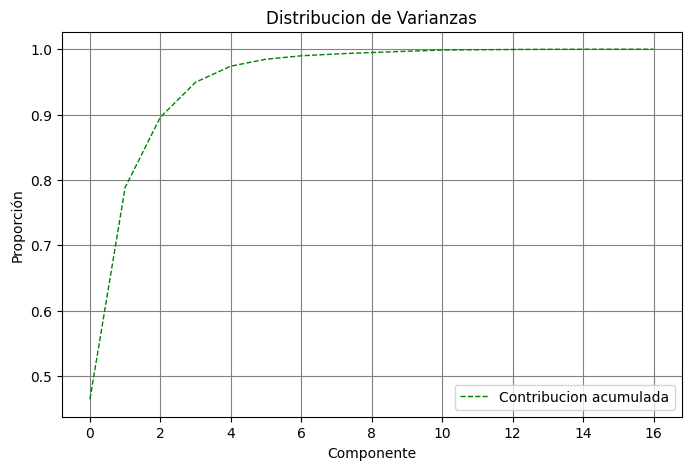

In [14]:
distribucion_vr(pca_vr)

In [15]:
pca_clases = PCA(n_components=2)

In [16]:
principalComponents=pca_clases.fit_transform(X)

In [17]:
principalComponents

array([[-1.9774124 ,  1.91214994],
       [-1.7302387 ,  3.16009165],
       [-2.50155583,  0.10708367],
       ...,
       [-5.24399426, -3.10398575],
       [-3.47910353,  3.83038266],
       [-4.14755975,  1.89427046]])

In [19]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

# PCA vs LDA

In [18]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [19]:
len(y_)

450000

In [20]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_).transform(X)

In [21]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.46458218 0.32423809]


In [22]:
len(X_r)

450000

In [23]:
len(X_r[y_ == i, 0])

150066

<Figure size 640x480 with 0 Axes>

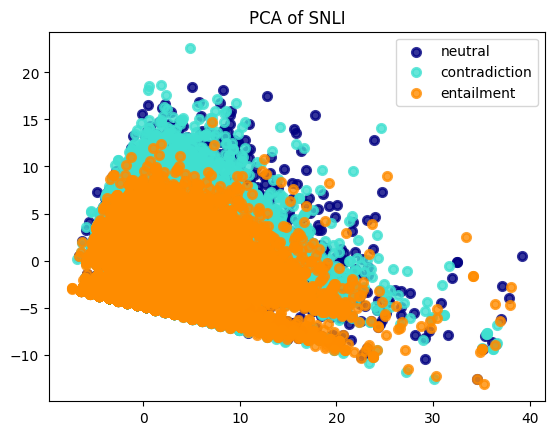

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SNLI")

plt.figure()

ValueError: x and y must be the same size

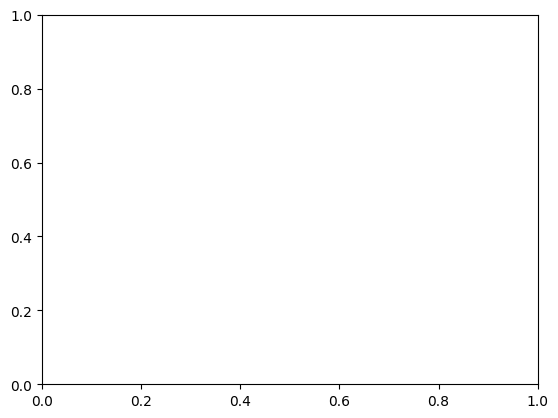

In [58]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r, y_t,color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SICK")

plt.figure()

Text(0.5, 1.0, 'LDA of SNLI')

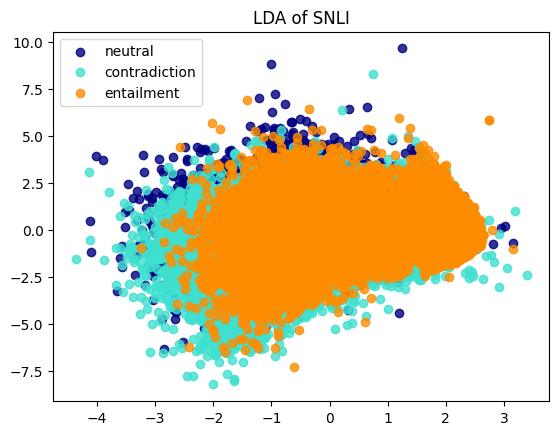

In [26]:
plt.figure()
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of SNLI")

# Proyection 3d

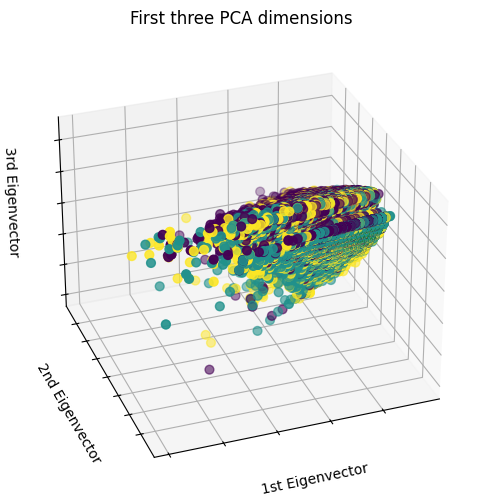

In [28]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_t,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()